## HW2 Unsupervised and Supervised Learning

**Deadline** 11:59 pm on November 3rd

Andrew Munro-West 18363572

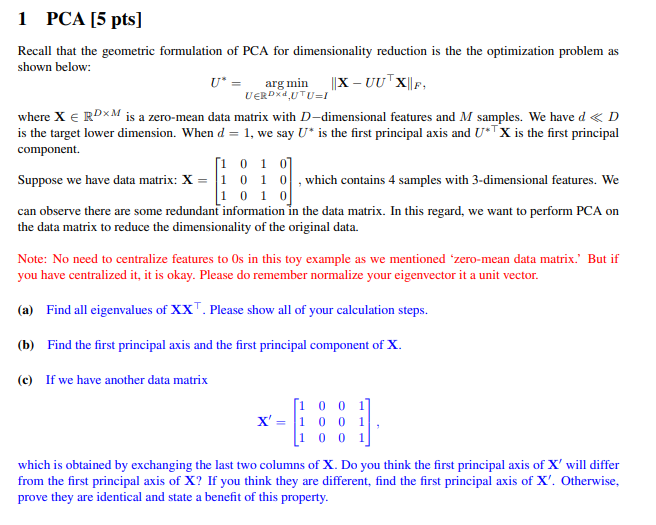

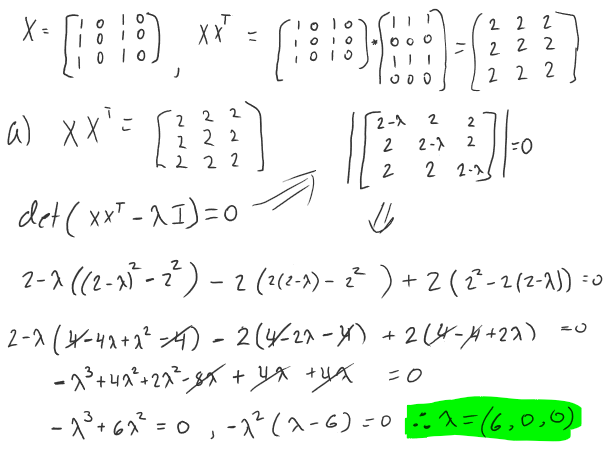

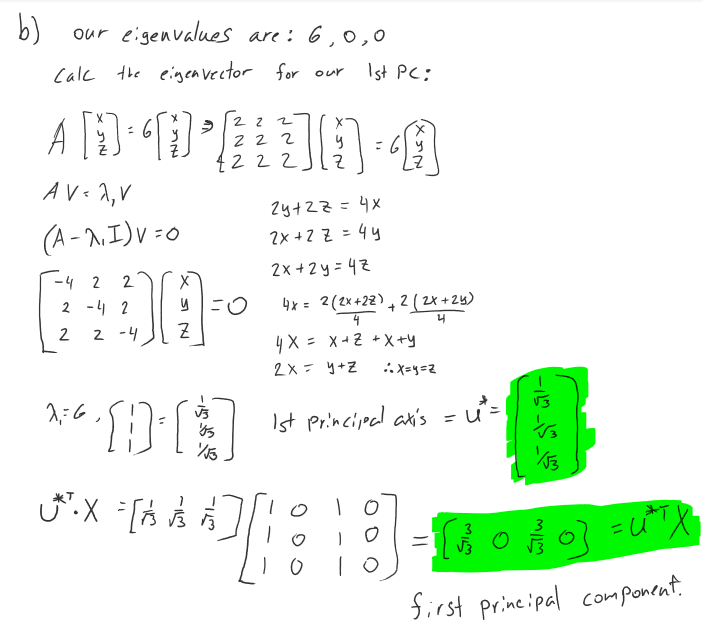

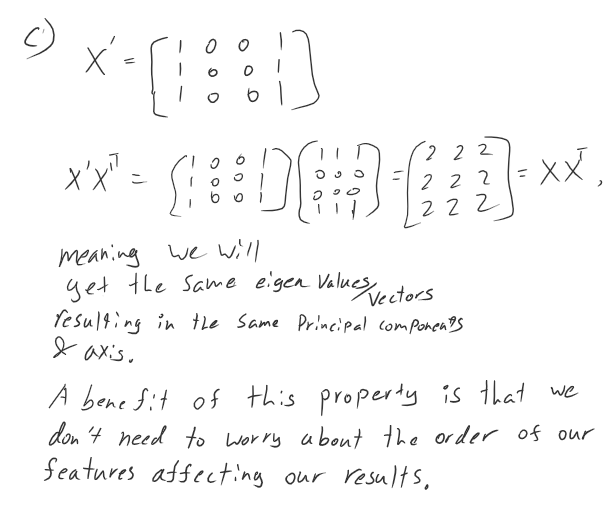

In this assignment you'll gain some hands-on experience with principal components analysis (PCA) and Supervised Learning methods such as Support Vector Machine (SVM) and Random Forest.

You need to install the following libraries: tensorflow and pillow. But if you use co-lab, no need for additional installations. 

In the first problem, you will study how different numbers of principal components represent the images visually. For the second problem you will utilize sklearn built in functions to perform classification on the provided data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Problem 2.1: PCA for dimension reduction (3 Points)

In this problem you will approximately reconstruct images by simplifying them to multiples of a few principal components.

Note: When you display the images, use the color map `cmap=plt.cm.gray.reversed()` for MNIST.

Pick a random seed in the next cell to select a random image of a handwritten $0$ from the MNIST data.

11490434/11490434 [==============================] - 0s 0us/step


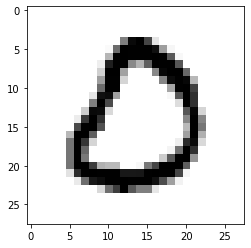

In [3]:
(x, y), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x = x.reshape([60000, 28*28])
zeros = np.where(y==0)[0]
x = x[zeros,:]
y = y[zeros]
np.random.seed(65) # put your seed here
my_image = np.random.randint(0, len(y), size=1)

plt.imshow(x[my_image,:].reshape((28,28)), cmap=plt.cm.gray.reversed())

For $k = 0, 10, 20, 30, 40, 50$, use $k$-th principal components for MNIST $0$'s to approximately reconstruct the image selected above. Noting that we index from 0, namely 0-th pricipal component is the first one. Display the reconstruction for each value of $k$. To display the set of images compactly, you may want to use the 'plot_images' function defined below.

In [4]:
def plot_images(images, titles, h, w, n_row=3, n_col=4, reversed=False):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        if reversed:
            plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        else:
            plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray.reversed())
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

Variance explained by first 50 principal vectors: 88.04%


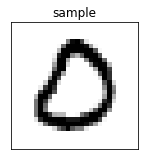

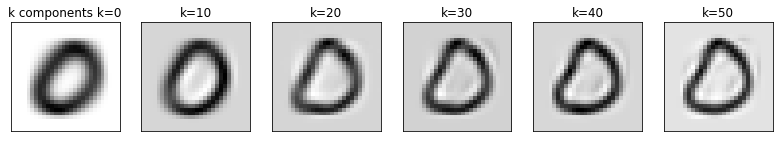

In [5]:
# Hint example code
from sklearn.decomposition import PCA

height = 28
width = 28


num_components = 50

avg = x.mean(axis = 0)
# x = x - avg

#initialize and fit PCA
pca = PCA(num_components).fit(x)

#get principal_vectors (components) of the fitted pca (size = (n_components, n_features)). The components are sorted by explained_variance_.
# principal_vectors = pca.components_[0]
# print(pca.components_)
# print(pca.singular_values_)
# check = np.sum(pca.singular_values_.reshape(51,1)*pca.components_, axis=0)
#reshape the principals vectors to the same size of input images
# principal_vectors = principal_vectors.reshape((num_components, height, width))
# print('reshaped',principal_vectors)
# fit the model with x and apply the dimensionality reduction on x.
# pcs = pca.transform(x)

# print(pcs)
# Transform data back to its original space
# capprox = pca.inverse_transform(pcs)


num_components_list = [0,10,20,30,40,50]
titles = ['k=0','k=10','k=20','k=30','k=40','k=50', 'k=780']
slice_title = ['kth component k=0', 'k=10','k=20','k=30','k=40','k=50']
full_title =['k components k=0', 'k=10','k=20','k=30','k=40','k=50']
pca_list = []
pcs_list = []
capprox_list = []
kth_slice_img = []
full_img= []

# images2= []
# # images4= []
# images5 =[]
# images6 = []

# for components in num_components_list:

  # principal_vectors = pca.components_[components]
  # eigenvalues = pca.singular_values_[components]
  
  # kth_slice_img.append(principal_vectors)
  # images4.append(principal_vectors*eigenvalues)
  # super = avg+principal_vectors
  # images2.append(super)
  # super2 = avg+principal_vectors*eigenvalues
  # images5.append(super2)

for components in num_components_list:
  pca_list.append(PCA(components).fit(x))
  pcs_list.append(pca_list[-1].transform(x))
  capprox_list.append(pca_list[-1].inverse_transform(pcs_list[-1]))
  full_img.append(capprox_list[-1][my_image,:])
  # images6.append(np.sum(pca_list[-1].components_, axis=0))



# plot
labels = ['principal vector %d' % (i+1) for i in np.arange(num_components)]

plot_images([x[my_image,:]], ['sample'], height, width, 1, 1)
# plot_images(kth_slice_img, slice_title, height, width, 1, len(num_components_list))
plot_images(full_img, full_title, height, width, 1, len(num_components_list))

# plot_images(images4, titles, height, width, 1, len(num_components_list))
# plot_images(images2, titles, height, width, 1, len(num_components_list))
# plot_images(images5, titles, height, width, 1, len(num_components_list))
# plot_images(images6, titles, height, width, 1, len(num_components_list))


# print(pca_list[0].components_)
# plot_images( x[my_image,:], ['sample']*6, height, width, n_row=1, n_col=6)

# show the obtained total variance
ratio = pca.explained_variance_ratio_.sum()
print('Variance explained by first %d principal vectors: %.2f%%' % (num_components, ratio*100))


# the instructions weren't clear but the piazza post said we should
# use sklearns transform and inverse transform to show the various image reconstructions
# for the first k components so that what i showed, most of the comments above hold
# functionality for showing individual single k components with or without averaging 
# and scaling. I put in extra work so i hope i don't lose marks on some technicality.

### Problem 2.2: SVM for classification (7 Points)

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
import sklearn.metrics as metrics
%matplotlib inline

In [7]:
# load data
train_data = pd.read_csv('/content/drive/MyDrive/data/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/data/test.csv')

# Set variables for the targets and features
y_train = train_data['price_range']
X_train = train_data.drop('price_range', axis=1)
y_test = test_data['price_range']
X_test = test_data.drop('price_range', axis=1)

0 mean, unit standard deviation normalizing

\begin{equation}
x' = \frac{x - x̄}{σ} 
\end{equation}


In [8]:
# TODO: Normalize Data
X_train = (X_train-X_train.mean())/X_train.std()
X_test = (X_test-X_test.mean())/X_test.std()
X_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.908125,-0.966882,0.832261,-1.018505,-0.758982,-1.030808,-1.408221,0.350391,1.335637,-1.089663,-1.295946,-1.417573,-1.150010,0.384034,-0.793528,0.287741,1.459562,-1.766012,-1.019864,0.968173
1,-0.500664,1.033563,-1.251661,0.981177,-0.988837,0.969466,1.125343,0.700316,-0.141293,-0.654146,-0.637492,0.575963,1.723452,0.458771,1.109797,-0.635987,-0.763497,0.565870,0.979869,-1.032185
2,-1.543217,1.033563,-1.251661,0.981177,-0.529127,0.969466,0.464413,1.400166,0.114330,0.216887,-0.637492,1.382388,1.089052,0.433251,-0.317697,-0.866919,-0.392988,0.565870,0.979869,-1.032185
3,-1.424849,1.033563,1.200012,-1.018505,-0.988837,-1.030808,-1.242988,1.050241,-0.283305,0.652404,-0.143653,1.276516,1.252317,0.584548,0.871881,0.518673,-0.022478,0.565870,-1.019864,-1.032185
4,1.320390,1.033563,-0.393575,-1.018505,1.999281,0.969466,0.629646,0.350391,0.000720,-1.089663,0.679414,1.258496,-0.086456,-0.653174,-1.031443,-0.866919,0.718542,0.565870,0.979869,-1.032185


### 2.2.a

The linear kernel is written as $<x,x'>$.

The parameter C, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

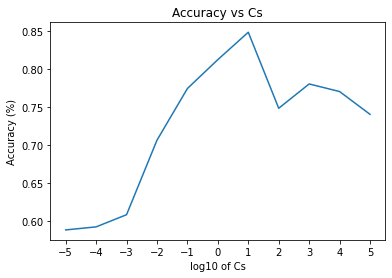

In [9]:
from sklearn.svm import LinearSVC

# TODO: Train Linear kernel SVM for different values of C on train data
Cs = 10.0**np.arange(-5, 6) # TODO: fill in the hyper-parameter candidates

# Cs = [0.1, 1, 10, 100, 1000, 10000]
scores = []

for c in Cs:
  lsvc = LinearSVC(random_state = 7, C = c)
  # TODO: Fit the model and get prediction and evalutation on testing data.
  lsvc.fit(X_train, y_train)
  y_pred = lsvc.predict(X_test)
  # TODO: Save your results
  scores.append(metrics.accuracy_score(y_test, y_pred))
# TODO: Plot accuracy on test data
plt.title('Accuracy vs Cs')
plt.xlabel('log10 of Cs')
plt.ylabel('Accuracy (%)')
plt.xticks(np.arange(-5,6))
plt.plot(np.log10(Cs), scores)

### 2.2.b

The RBF kernel is expressed as $exp(γ\|x-x' \|)$.

$\gamma$ defines how much influence a single training example has. The larger $\gamma$ is, the closer other examples must be to be affected.

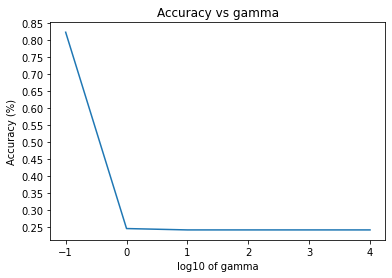

In [10]:
from sklearn.svm import SVC

# TODO: Train RBF kernel SVM for different values of gamma on train data
scores = []
gammas = 10.0**np.arange(-1, 5) # TODO: fill in the hyper-parameter candidates

for g in gammas:
  rsvc = SVC(random_state = 7, C=1.0, kernel='rbf', gamma = g)
  # TODO: Fit the model and get prediction and evalutation on testing data.
  rsvc.fit(X_train, y_train)
  y_pred = rsvc.predict(X_test)

  # TODO: Save your results
  scores.append(metrics.accuracy_score(y_test, y_pred))


# TODO: Plot accuracy on test data
plt.title('Accuracy vs gamma')
plt.xlabel('log10 of gamma')
plt.ylabel('Accuracy (%)')
plt.xticks(np.arange(-1,5))
plt.yticks(np.arange(0.0, 1, 0.05))
plt.plot(np.log10(gammas), scores)

### 2.2.c

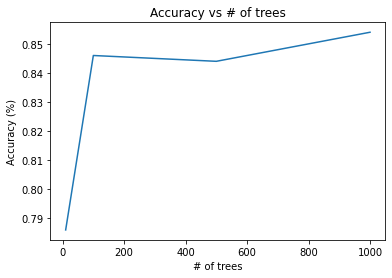

In [11]:
from sklearn.ensemble import RandomForestClassifier

n_trees = [10, 100, 500, 1000] # TODO: fill in the hyper-parameter candidates
scores = []
# TODO: Train Random Forest for different values of number of estimators on train data
for n in n_trees:
  rf = RandomForestClassifier(random_state = 7, n_estimators=n)
  # TODO: Fit the model and get prediction and evalutation on testing data.
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)
  # TODO: Save your results
  scores.append(metrics.accuracy_score(y_test, y_pred))

# TODO: Plot accuracy on test data
plt.title('Accuracy vs # of trees')
plt.xlabel('# of trees')
plt.ylabel('Accuracy (%)')
# plt.xticks(np.arange(-1,5))
# plt.yticks(np.arange(0.0, 1, 0.05))
plt.plot(n_trees, scores)

### 2.2.d

In [12]:
from sklearn.model_selection import GridSearchCV, KFold

n_folds = 5

# configure the cross-validation procedure
cv = KFold(n_splits=n_folds, shuffle=True, random_state=1)


# TODO: define search space
lsvc_param_grid = {'C': 10.0**np.arange(-5, 6)}
rsvc_param_grid = {'gamma':10.0**np.arange(-1, 5) } #'kernel':('linear', 'rbf'), 'C': 10.0**np.arange(-5, 6),'gamma':10.0**np.arange(-1, 5) }
rf_param_grid = {'n_estimators': [10, 100, 500, 1000]}

# TODO: define the model for parts a, b, and C
lsvc = LinearSVC(random_state = 7)
rsvc = SVC(random_state = 7, C=1.0, kernel='rbf')
rf = RandomForestClassifier(random_state = 7)

# TODO: Perform a grid search and cross-validation to find the optimal hyperparameters of parts a, b, and c
search_lsvc = GridSearchCV(lsvc, lsvc_param_grid, scoring='accuracy', n_jobs=-1, cv=cv)
search_rsvc = GridSearchCV(rsvc, rsvc_param_grid, scoring='accuracy', n_jobs=-1, cv=cv)
search_rf = GridSearchCV(rf, rf_param_grid, scoring='accuracy', n_jobs=-1, cv=cv)

# TODO: For each part, report the optimal value
result_lsvc = search_lsvc.fit(X_train, y_train)
result_rsvc = search_rsvc.fit(X_train, y_train)
result_rf = search_rf.fit(X_train, y_train)


best_model_lsvc = result_lsvc.best_estimator_
best_model_rsvc = result_rsvc.best_estimator_
best_model_rf = result_rf.best_estimator_

print('\nOptimal models: ')
print(f'lsvc: {best_model_lsvc}')
print(f'rsvc: {best_model_rsvc}')
print(f'Random Forrest: {best_model_rf}\n')

# TODO: For each part, report the accuracy on test data for the best estimator
yhat_lsvc = best_model_lsvc.predict(X_test)
yhat_rsvc = best_model_rsvc.predict(X_test)
yhat_rf = best_model_rf.predict(X_test)


print('Accuracy scores: ')
print(f'lsvc: {metrics.accuracy_score(y_test,yhat_lsvc)}')
print(f'rsvc: {metrics.accuracy_score(y_test,yhat_rsvc)}')
print(f'Random Forrest: {metrics.accuracy_score(y_test,yhat_rf)}')

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,



Optimal models: 
lsvc: LinearSVC(C=10.0, random_state=7)
rsvc: SVC(gamma=0.1, random_state=7)
Random Forrest: RandomForestClassifier(n_estimators=500, random_state=7)

Accuracy scores: 
lsvc: 0.848
rsvc: 0.822
Random Forrest: 0.844


Hint: Here I provide an example code of how to use GridSearchCV. For more information, please refer to [Scikit Learn - GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [13]:
'''
This is only a piece of example code of how to use GridSearchCV.
You don't need to do anything here. 
You can refer to this example code and implement Prob 2.d.
'''
# # define search
# search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)

# # execute search
# result = search.fit(X_train, y_train)

# # get the best performing model fit on the whole training set
# best_model = result.best_estimator_

# # evaluate model on the hold out dataset
# yhat = best_model.predict(X_test)

"\nThis is only a piece of example code of how to use GridSearchCV.\nYou don't need to do anything here. \nYou can refer to this example code and implement Prob 2.d.\n"

• Collaboration policy: The purpose of student collaboration is to facilitate learning, not to circumvent it.
Studying the material in groups is strongly encouraged. It is also allowed to seek help from other students
in understanding the material needed to solve a particular homework problem, provided no written notes
(including code) are shared, or are taken at that time, and provided learning is facilitated, not circumvented.
The actual solution must be done by each student alone. The presence or absence of any form of help or
collaboration, whether given or received, must be explicitly stated and disclosed in full by all involved.




As such im disclosing that I looked at piazza, the internet, books and wrote the entire assignment myself.

I also taught Andrew Ehebald almost everything he knows about python and explained to him the intuitive concepts behind everything we did in this assignment. Other than that if anyone asked me about the assignment I told them it was easy and you could do it all reading the documentation.